🚀 This guide explains how to use:
- Test Time Augmentation (TTA) tutorial
- Test Model Ensembling Tutorial 
- Test Pruning/Sparsity Tutorial.

Testing for improved mAP(mean average precision) and Recall (Recall measures how well you find all the positives.).

# Setup

In [ ]:
'''
git clone https://github.com/ultralytics/yolov5 # clone repo
cd yolov5
pip install -r requirements.txt # install requirements.txt
'''

In [1]:
#shell directory
%cd yolov5

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5


In [2]:
# DIRs [needed if you use %cd command multiple times or use the shell with different paths]
import sys
import os
#script dir 
scriptdir=sys.path[0] #os.getcwd()
#yolov5 Dir
yolov5_dir=os.path.join(scriptdir, 'yolov5/')
print(yolov5_dir)
#json2yolo Dir
json2yolo_dir=os.path.join(scriptdir, 'json2yolo/')
print(json2yolo_dir)

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5/
C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\json2yolo/


In [4]:
#YAML Paths # use different yamls
datasetyaml=os.path.join(scriptdir, 'coco_external.yaml')

# Test Normally

Before trying the features we want to establish the baseline performance by testing under default settings. This command tests YOLOv5x on COCO val2017 at image size 640 pixels. yolov5x.pt is the largest and most accurate model available. Other options are yolov5s.pt, yolov5m.pt and yolov5l.pt, or you own checkpoint from training a custom dataset ./weights/best.pt. For details on all available models please see our README table.

In [6]:
!python test.py --weights yolov5x.pt --data $datasetyaml --img 640

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='data/coco.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.65, name='exp', project='runs/test', save_conf=False, save_json=True, save_txt=False, single_cls=False, task='val', verbose=False, weights=['yolov5x.pt'])
Fusing layers... 
                 all       5e+03    3.63e+04       0.409       0.754       0.672       0.483
Speed: 48.6/2.5/51.1 ms inference/NMS/total per 640x640 image at batch-size 32

Evaluating pycocotools mAP... saving runs\test\exp2\yolov5x_predictions.json...
loading annotations into memory...
Done (t=0.98s)
creating index...
index created!
Loading and preparing results...
DONE (t=5.18s)
creating index...
index created!
ERROR: pycocotools unable to run: 'numpy.float64' object cannot be interpreted as an integer
Results saved to runs\test\exp2


Using torch 1.7.0 CUDA:0 (GeForce GTX 1070, 8192MB)

Model Summary: 484 layers, 88922205 parameters, 0 gradients

0it [00:00, ?it/s]
Scanning labels ..\coco\labels\val2017.cache (1276 found, 0 missing, 13 empty, 0 duplicate, for 5000 images): 1289it [00:00, 12762.85it/s]
Scanning labels ..\coco\labels\val2017.cache (2564 found, 0 missing, 24 empty, 0 duplicate, for 5000 images): 2588it [00:00, 12830.02it/s]
Scanning labels ..\coco\labels\val2017.cache (3790 found, 0 missing, 33 empty, 0 duplicate, for 5000 images): 3823it [00:00, 12643.25it/s]
Scanning labels ..\coco\labels\val2017.cache (4952 found, 0 missing, 48 empty, 0 duplicate, for 5000 images): 5000it [00:00, 12531.13it/s]

               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:   0%|          | 0/157 [00:00<?, ?it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:   1%|          | 1/157 [00:04<12:31,  4.82s/it]
               Class      Images  

# TTA

🚀 This guide explains how to use Test Time Augmentation (TTA) during testing and inference for improved mAP(mean average precision) and Recall (Recall measures how well you find all the positives.).

## Test with TTA

Append `--augment` to any existing test.py command to enable TTA, and increase the image size by about 30% for improved results. Note that inference with TTA enabled will typically take about 2-3X the time of normal inference as the images are being left-right flipped and processed at 3 different resolutions, with the outputs merged before NMS. Part of the speed decrease is simply due to larger image sizes (832 vs 640), while part is due to the actual TTA operations.

In [7]:
!python test.py --weights yolov5x.pt --data $datasetyaml --img 832 --augment

Namespace(augment=True, batch_size=32, conf_thres=0.001, data='C:\\Users\\nmc_costa\\google_drive\\projects\\bosch_P19\\research\\python_ws\\violent_action\\yolo\\coco_external.yaml', device='', exist_ok=False, img_size=832, iou_thres=0.65, name='exp', project='runs/test', save_conf=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['yolov5x.pt'])
Fusing layers... 
                 all       5e+03    3.63e+04       0.308       0.807       0.683       0.497

Using torch 1.7.0 CUDA:0 (GeForce GTX 1070, 8192MB)

Model Summary: 484 layers, 88922205 parameters, 0 gradients

0it [00:00, ?it/s]
Scanning labels ..\coco\labels\val2017.cache (1268 found, 0 missing, 13 empty, 0 duplicate, for 5000 images): 1281it [00:00, 12683.52it/s]
Scanning labels ..\coco\labels\val2017.cache (2533 found, 0 missing, 23 empty, 0 duplicate, for 5000 images): 2556it [00:00, 12702.40it/s]
Scanning labels ..\coco\labels\val2017.cache (3783 found, 0 missing, 33 empty, 0 duplicate, for 5000 images): 3816it [00:00, 12634.37it/s]
Scanning labels ..\coco\labels\val2017.cache (4952 found, 0 missing, 48 empty, 0 duplicate, for 5000 images): 5000it [00:00, 12680.70it/s]

               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:   0%|          | 0/157 [00:00<?, ?it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:   1%|          | 1/157 [00:07<20:17,  7.80s/it]
               Class      Images  


Speed: 302.5/5.0/307.5 ms inference/NMS/total per 832x832 image at batch-size 32
Results saved to runs\test\exp3


               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:  22%|##1       | 34/157 [03:24<11:57,  5.83s/it]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:  22%|##2       | 35/157 [03:30<11:53,  5.85s/it]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:  23%|##2       | 36/157 [03:36<11:46,  5.84s/it]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:  24%|##3       | 37/157 [03:41<11:40,  5.84s/it]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:  24%|##4       | 38/157 [03:47<11:36,  5.85s/it]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:  25%|##4       | 39/157 [03:53<11:38,  5.92s/it]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:  25%|##5       | 40/157 [03:59<11:32,  5.92s/it]

## Inference with TTA

detect.py TTA inference operates identically to test.py TTA: simply append --augment to any existing detect.py command:

In [11]:
!python detect.py --weights yolov5s.pt --img 832 --source data/images/ --augment

Namespace(agnostic_nms=False, augment=True, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=832, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['yolov5s.pt'])
Fusing layers... 


Using torch 1.7.0 CUDA:0 (GeForce GTX 1070, 8192MB)

Model Summary: 232 layers, 7459581 parameters, 0 gradients


image 1/2 C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5\data\images\bus.jpg: 832x640 4 persons, 1 buss, Done. (0.043s)
image 2/2 C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5\data\images\zidane.jpg: 480x832 2 persons, 2 ties, Done. (0.033s)
Results saved to runs\detect\exp3
Done. (0.938s)


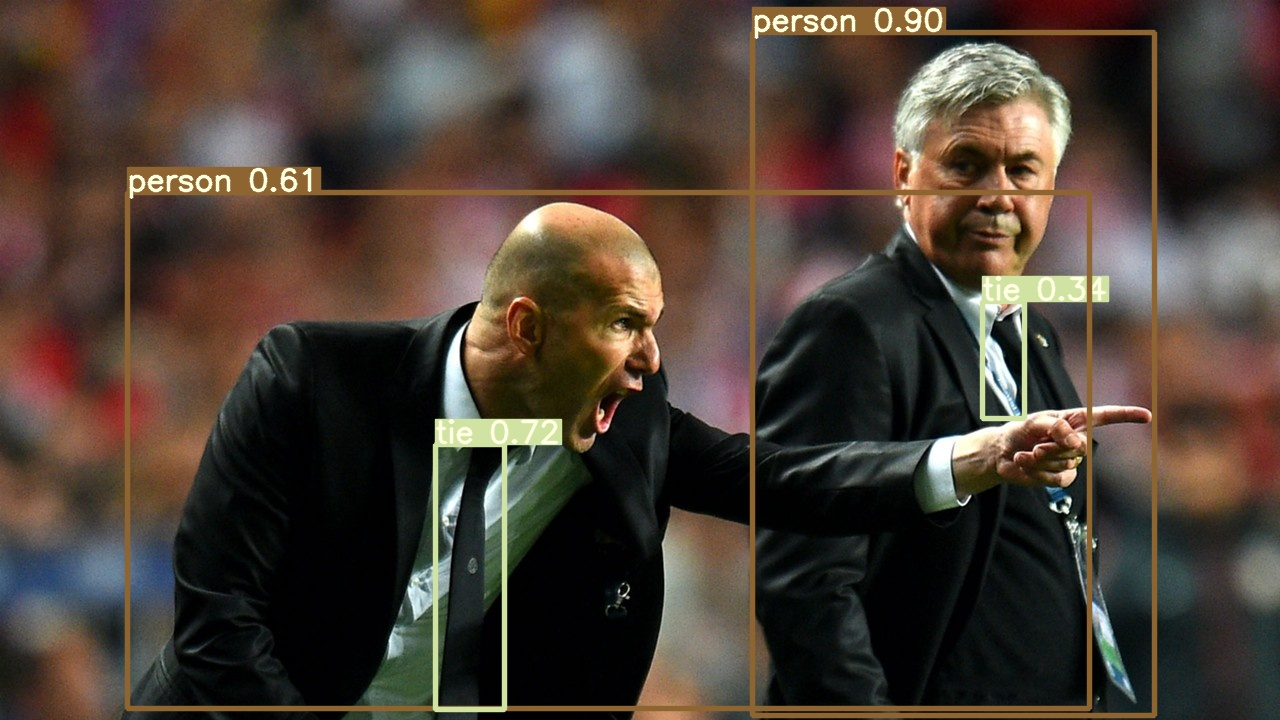

In [14]:
from IPython.display import Image
Image(filename='runs/detect/exp3/zidane.jpg', width=600)

# Ensemble

🚀 This guide explains how to use model ensembling during testing and inference for improved mAP and Recall. From https://www.sciencedirect.com/topics/computer-science/ensemble-modeling:

>Ensemble modeling is a process where multiple diverse models are created to predict an outcome, either by using many different modeling algorithms or using different training data sets. The ensemble model then aggregates the prediction of each base model and results in once final prediction for the unseen data. The motivation for using ensemble models is to reduce the generalization error of the prediction. As long as the base models are diverse and independent, the prediction error of the model decreases when the ensemble approach is used. The approach seeks the wisdom of crowds in making a prediction. Even though the ensemble model has multiple base models within the model, it acts and performs as a single model.

## Ensemble Test 

Multiple pretraind models may be ensembled togethor at test and inference time by simply appending extra models to the --weights argument in any existing test.py or detect.py command. This example tests an ensemble of 2 models togethor:

- YOLOv5x
- YOLOv5l

In [ ]:
!python test.py --weights yolov5x.pt yolov5l.pt --data $datasetyaml --img 640

## Ensemble Inference

Append extra models to the --weights argument to run ensemble inference:

In [ ]:
!python detect.py --weights yolov5s.pt yolov5x.pt --img 640 --source data/images/

In [ ]:
from IPython.display import Image
Image(filename='runs/detect/exp4/zidane.jpg', width=600)

# Pruning/Sparsity

🚀 This guide explains how to apply model pruning to a YOLOv5 model.

## Test with 30% Pruned Model

We now repeat the above 'test normally' with a pruned model. Any model may be pruned after loading with the torch_utils.prune() command. In this example we prune a model after loading it for testing in test.py. We update test.py as: 1)go to yolov5.test.test() and 2) add before #configure the command torch_utils.prune(model. 0.3)


In [16]:
from IPython.display import Image
Image(url='https://user-images.githubusercontent.com/26833433/86542042-db48ba00-bec6-11ea-8417-ab8f4a2bd555.png')

In [ ]:
!python test.py --weights yolov5x.pt --data $datasetyaml --img 640

In the results we can observe that we have achieved a sparsity of 30% in our model after pruning, which means that 30% of the model's weight parameters in nn.Conv2d layers are equal to 0. The testing time (on a P100 GPU) remains unchanged, while the model's AP and AR scores a slightly reduced.